In [2]:
import sys
import glob,os
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
sys.path.append("../")
import utils.data_utils as du
import utils.visualization_utils as vu

/Users/anaismoller/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# Init paths
raw_dir = os.environ.get("DES_DATA")
dump_dir = './dump/data_skimming/'
debug=False

In [4]:
# load complete data
# do run: process_Data_for_notebooks.py first! the notebook crashes with such large data to process
df= {} # only header
df_w_photo = {} # merged with photometry
for dtype in ["fake", "real"]:
    df_head_tmp = []
    df_head_w_phot_tmp = []
    bazin_file = f"{Path(raw_dir)}/DESALL_forcePhoto_{dtype}_snana_fits/DESALL_{dtype}_Bazin_fit.SNANA.TEXT"
    if Path(bazin_file).exists():
        df_bazin = du.load_bazin_fits(bazin_file)
        
    list_files = glob.glob(os.path.join(f"{raw_dir}/DESALL_forcePhoto_{dtype}_snana_fits/", "*PHOT.FITS"))
    for fname in list_files[:1]:
        dump_prefix = Path(fname).name.split("_")[0]

        df_header, df_phot = du.read_fits(fname)
        df_header = pd.merge(df_header, df_bazin, on='SNID')
        df_header = df_header[[
            k for k in df_header.keys() if 'Unnamed' not in k]]
        
#         df_head_w_phot = df_header.merge(df_phot,on='SNID')
        
        df_head_tmp.append(df_header)
#         df_head_w_phot_tmp.append(df_head_w_phot)
    df[dtype] = pd.concat(df_head_tmp)
#     df_w_photo[dtype] = pd.concat(df_head_w_phot_tmp)

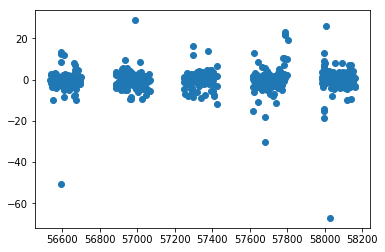

In [8]:
df_phot[df_phot['MJD']==-777.0]=0
plt.scatter(df_phot[df_phot['SNID']==1761028]['MJD'],df_phot[df_phot['SNID']==1761028]['FLUXCAL'])

In [ ]:
#sanity check for bazin
# only for fakes
fig = plt.figure()
plt.hist(df['fake']['PRIVATE(DES_fake_peakmjd)']-df['fake']["PKMJDINI"],histtype="step",label='bazin',bins=10)
plt.hist(df['fake']['PRIVATE(DES_fake_peakmjd)']-df['fake']["PEAKMJD"],histtype="step",label='PSNID')
plt.hist(df['fake']['PRIVATE(DES_fake_peakmjd)']-df['fake']["PRIVATE(DES_mjd_trigger)"],histtype="step",label='trigger',bins=100)
plt.xlabel('peak-')
plt.yscale("log")
plt.legend()

In [16]:
df['fake'][df['fake']['PRIVATE(DES_fake_salt2x1)']>4].SNID.values

array([532484, 532522, 532526, 532573, 532597, 532630, 532658, 532674,
       532705, 532707, 532709, 532789, 532821, 532909, 532919, 532984,
       533116, 533141, 533164, 533322, 533357, 533371, 533378, 533410,
       533439, 533442, 533452, 533464, 533471, 533564, 533606, 533692,
       533715, 533781, 533812, 533838, 534046, 534121, 534126, 534141,
       534184, 534197, 534210, 534228, 534262, 534342, 534471, 534612,
       534616, 534644, 534648, 534661, 534682, 534725, 534729, 534743,
       534796, 534848, 534876, 534890, 534997, 534998, 535018, 535114,
       535118, 535143, 535170, 535224, 535235, 535266, 535303, 535310,
       535321, 535419, 535432, 535435, 535443, 535457, 535458, 535481,
       535487, 535517, 535541, 535615, 535630, 535648, 535730, 535735,
       535794, 535853, 535966, 535987, 536006, 536082, 536116, 536142,
       536156, 536163, 536208, 536213, 536218, 536255, 536307, 536410,
       536416, 536425, 536429, 536463, 536465, 536502, 536516, 536544,
      

In [ ]:
fig = plt.figure()
plt.hist(df['fake']['PRIVATE(DES_fake_peakmjd)']-df['fake']["PEAKMJD"],histtype="step",label='PSNID',bins=100)
plt.hist(df['fake']['PRIVATE(DES_fake_peakmjd)']-df['fake']["PRIVATE(DES_mjd_trigger)"],histtype="step",label='trigger',bins=10000)
plt.hist(df['fake']['PRIVATE(DES_fake_peakmjd)']-df['fake']["PKMJDINI"],histtype="step",label='bazin',bins=1000)
plt.xlabel('delta(peak-estimated peak)')
plt.yscale("log")
plt.xlim(-100,100)
plt.legend()

inspecting the ones that fail the windowing procedure

In [ ]:
df['fake']['fakemjd'] = df['fake']['PRIVATE(DES_fake_peakmjd)']
df['fake']['trigger'] = df['fake']['PRIVATE(DES_mjd_trigger)']
df['fake']['delta_trigger'] = df['fake'].apply(
        lambda row: row.trigger - row.fakemjd, axis=1)
df['fake']['delta_bazin'] = df['fake'].apply(
        lambda row: row.PKMJDINI - row.fakemjd, axis=1)

In [ ]:
# fail trigger
df_fail_trigger = df['fake'][(df['fake']['delta_trigger']<-30) & (df['fake']['trigger']>0)]
# fail bazin
df_fail_bazin = df['fake'][abs(df['fake']['delta_bazin']) > 100]

In [ ]:
# need to get photometry as well
df_wp_fail_trigger = df_w_photo['fake'][df_w_photo['fake'].SNID.isin(df_fail_trigger['SNID'].values)]
df_wp_fail_bazin = df_w_photo['fake'][df_w_photo['fake'].SNID.isin(df_fail_bazin['SNID'].values)]

In [32]:
# df_wp_fail_bazin = df_wp_fail_bazin[df_wp_fail_bazin['PRIVATE(DES_fake_z)']<0.5]

[Plot light-curves] 


/Users/anaismoller/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


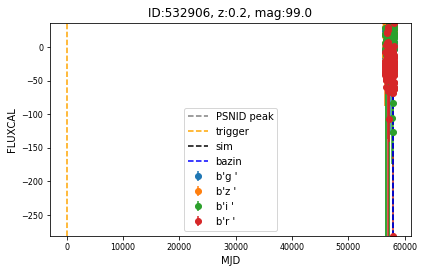

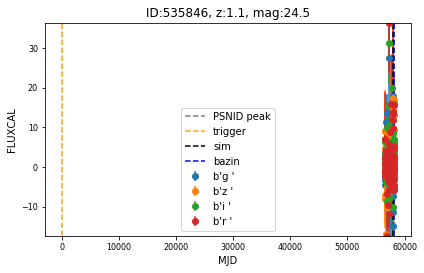

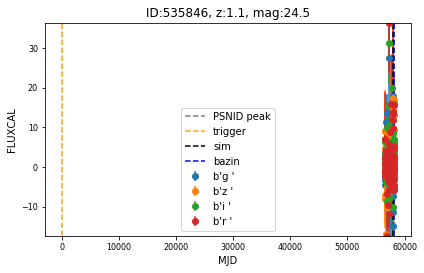

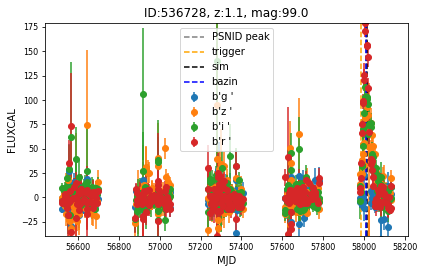

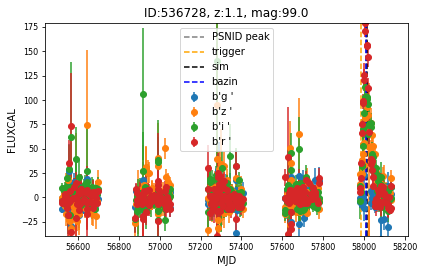

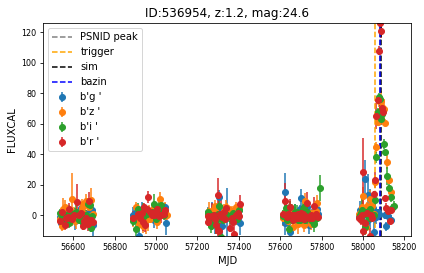

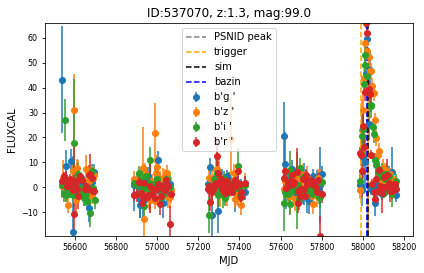

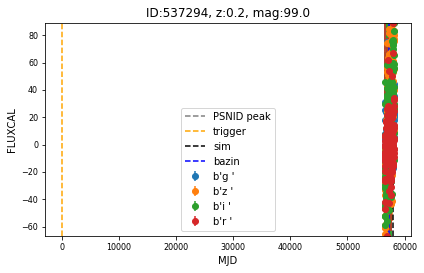

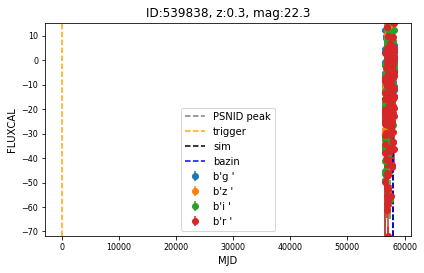

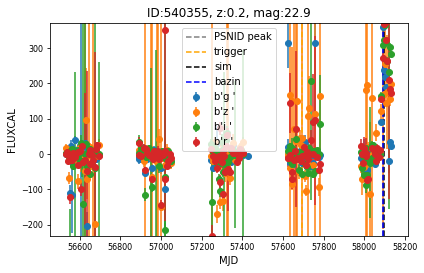

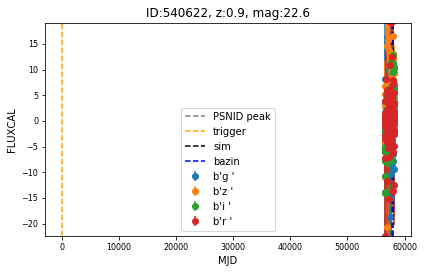

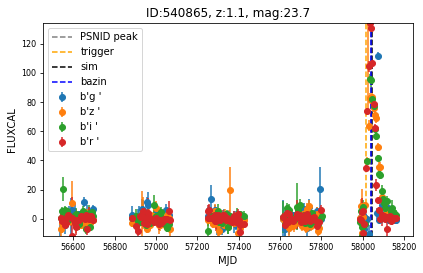

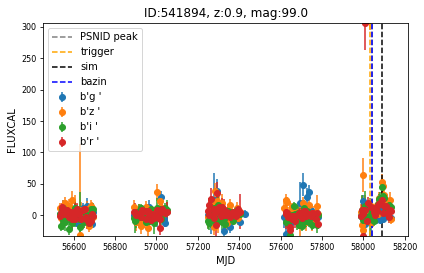

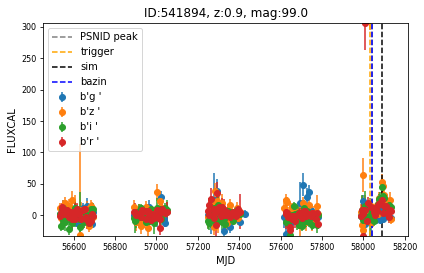

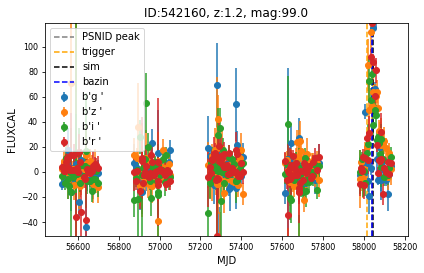

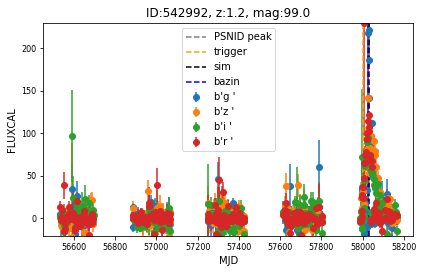

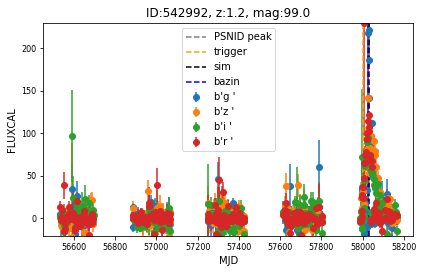

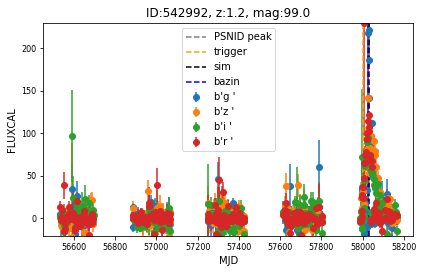

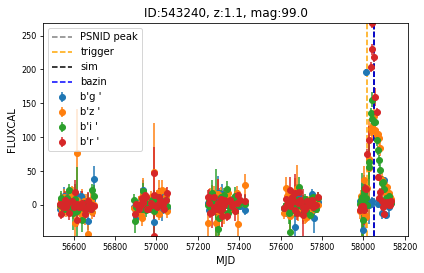

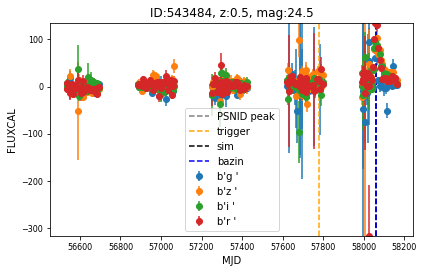

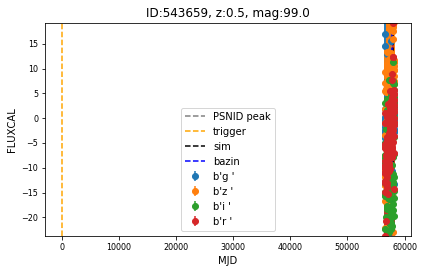

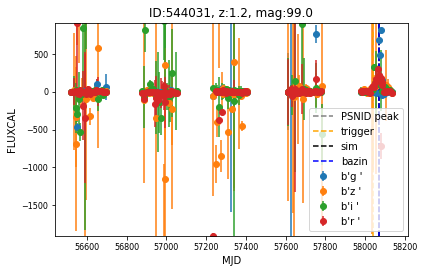

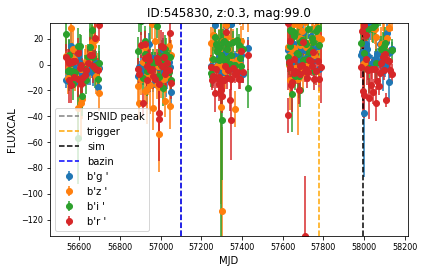

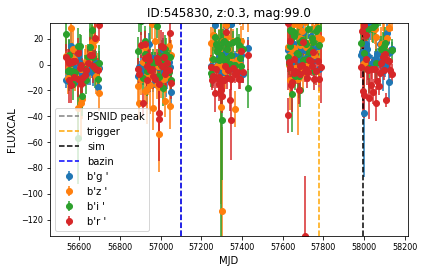

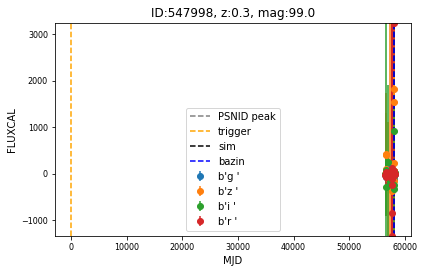

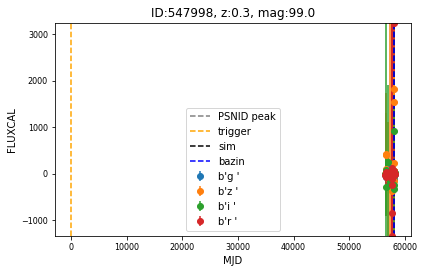

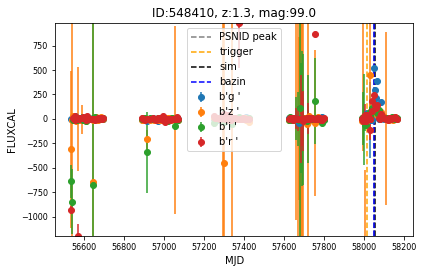

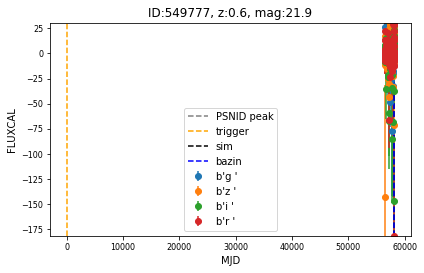

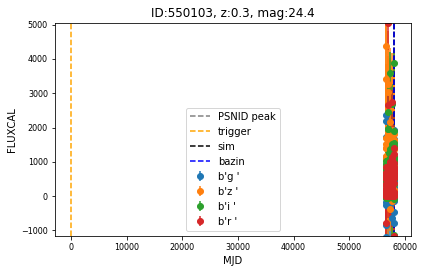

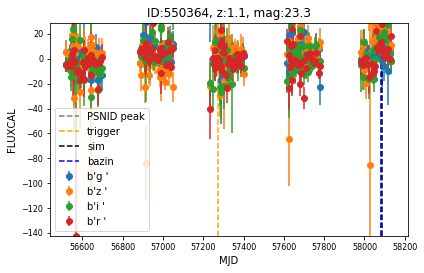

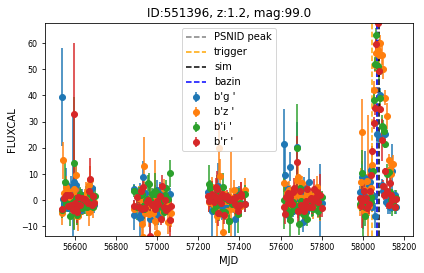

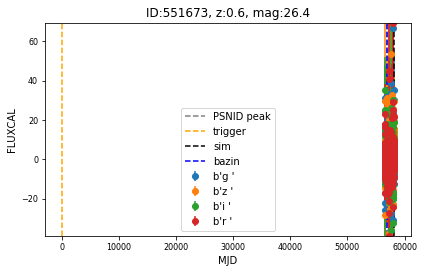

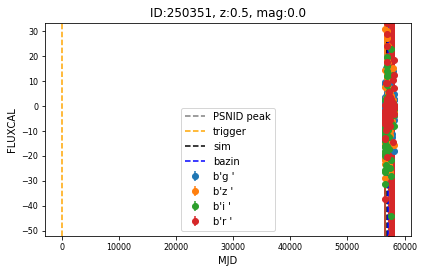

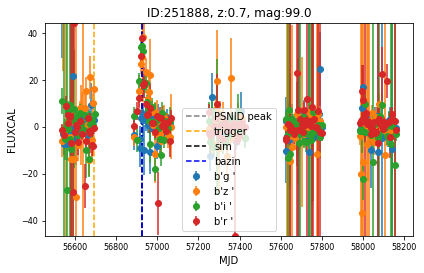

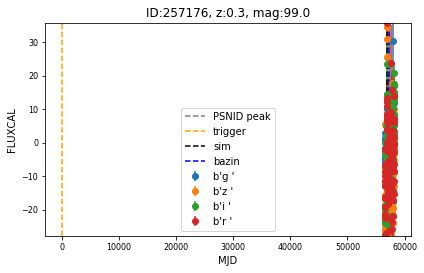

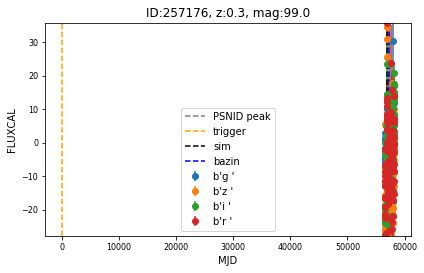

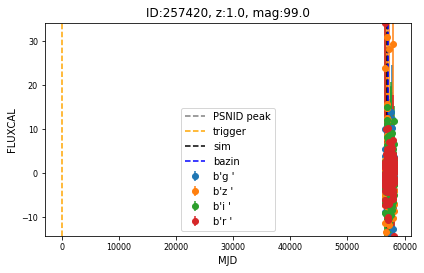

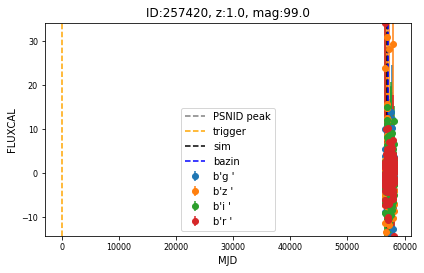

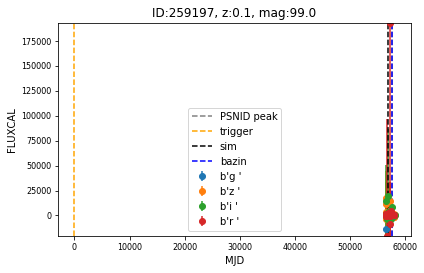

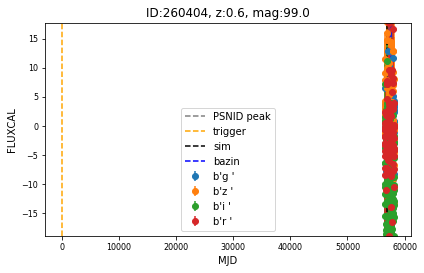

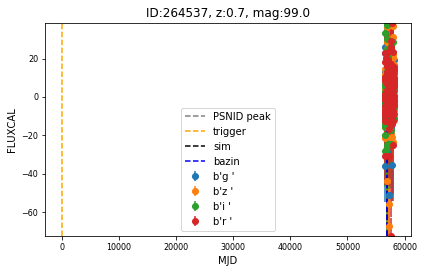

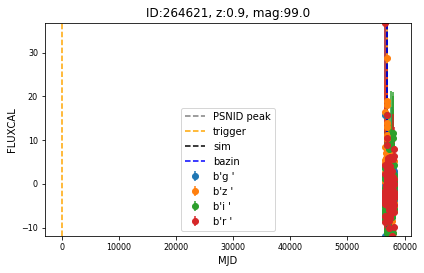

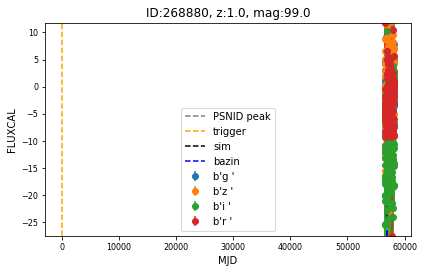

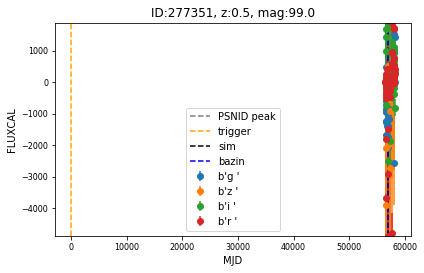

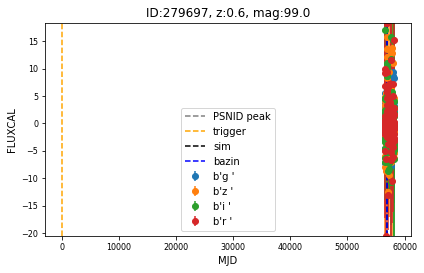

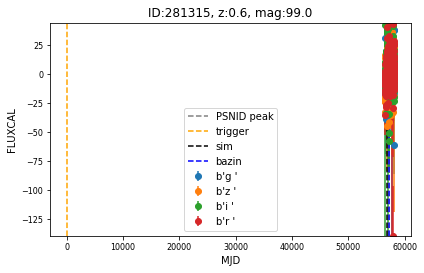

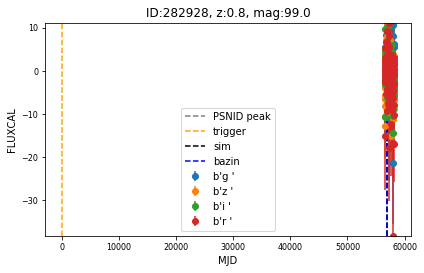

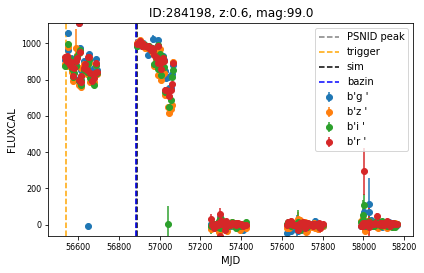

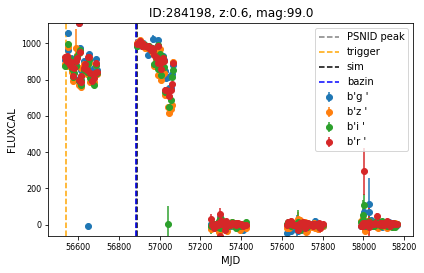

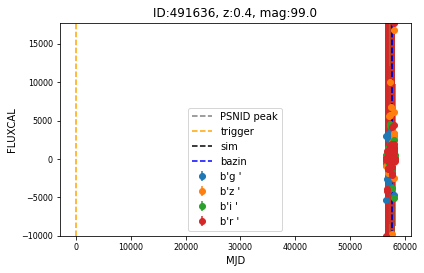

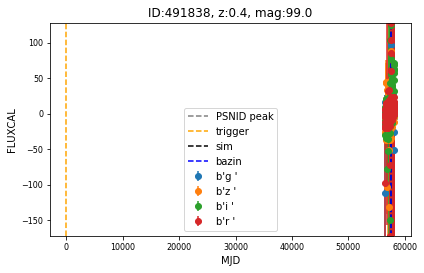

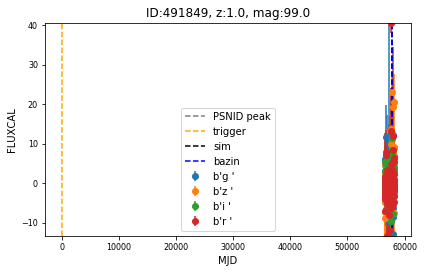

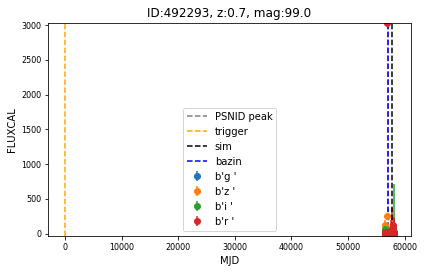

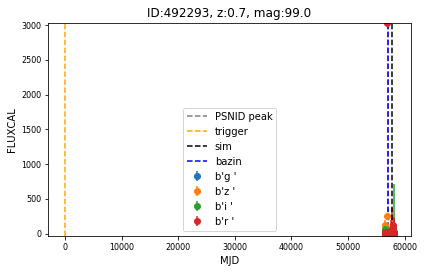

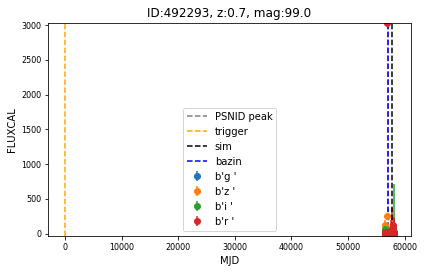

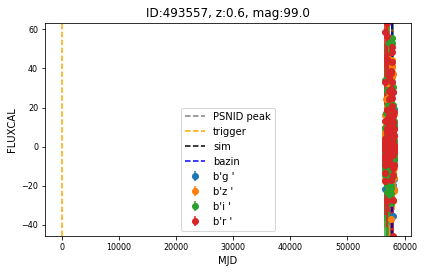

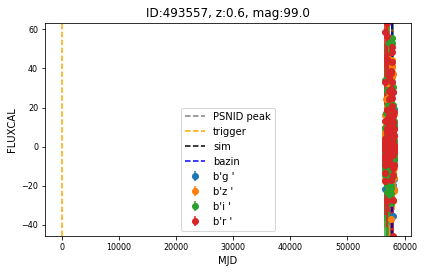

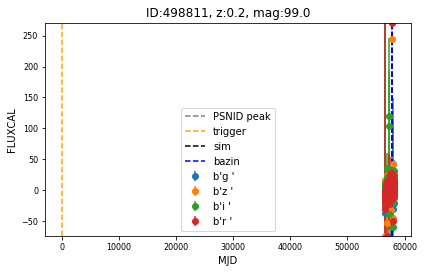

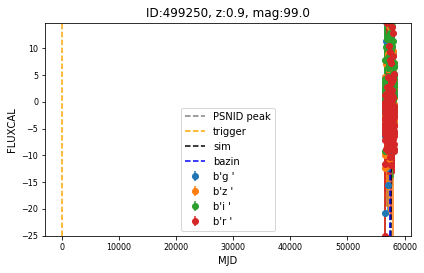

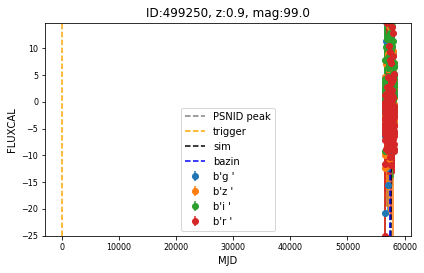

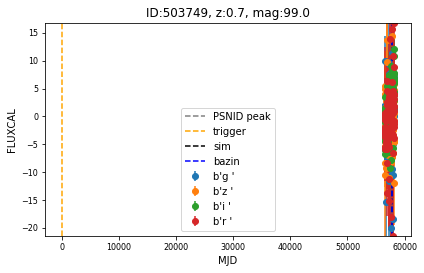

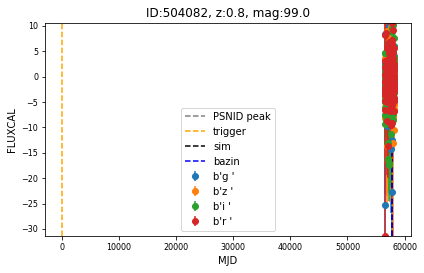

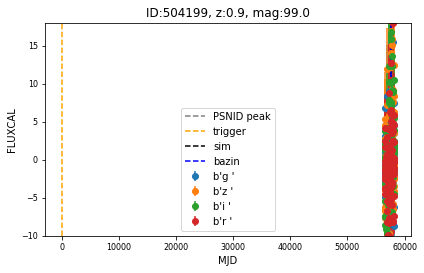

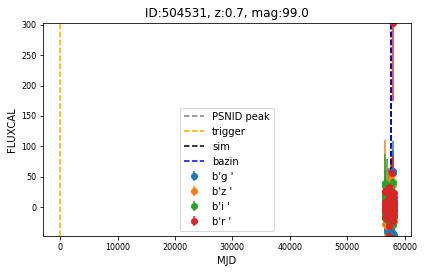

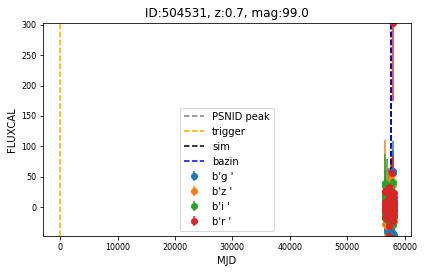

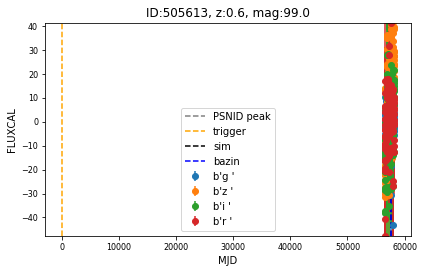

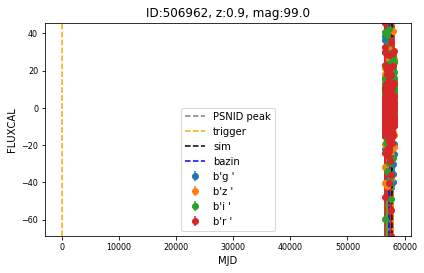

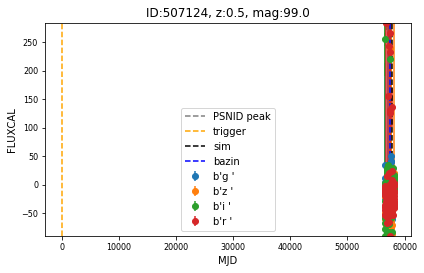

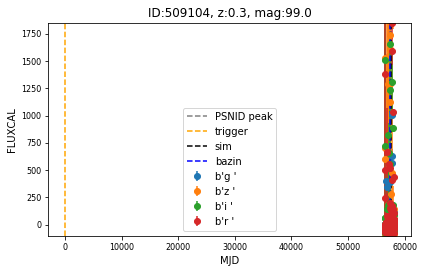

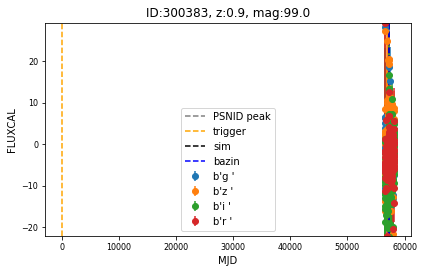

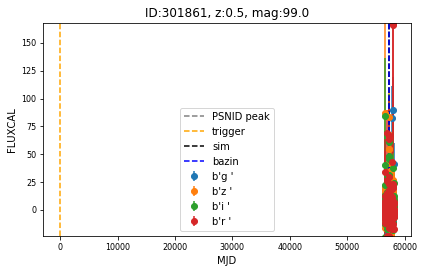

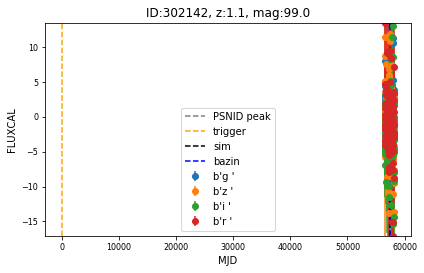

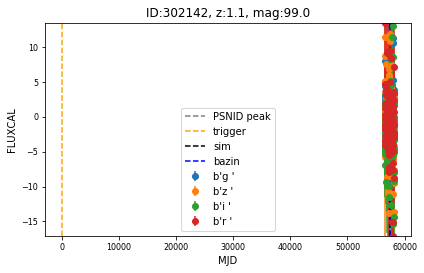

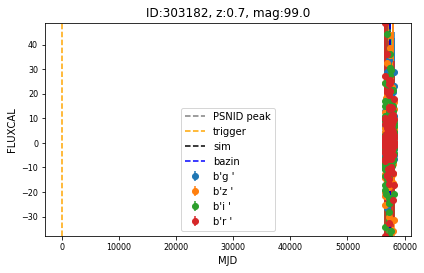

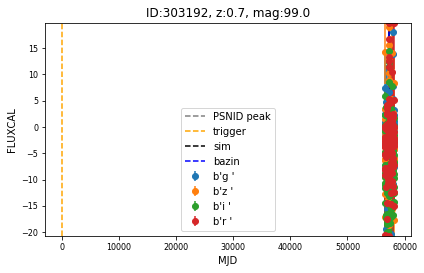

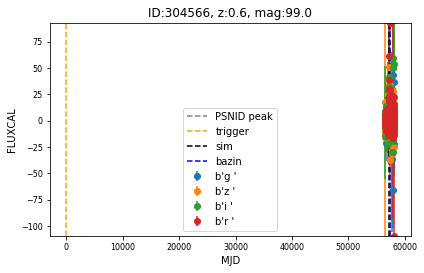

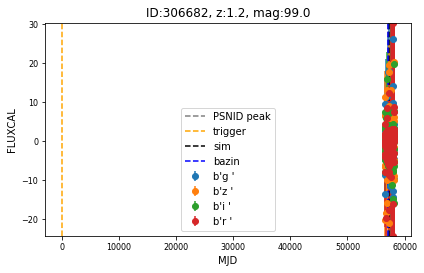

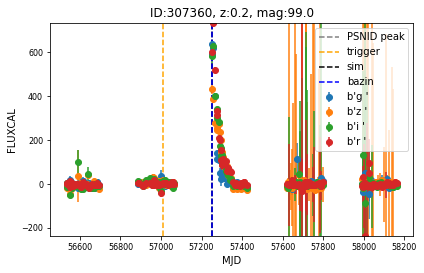

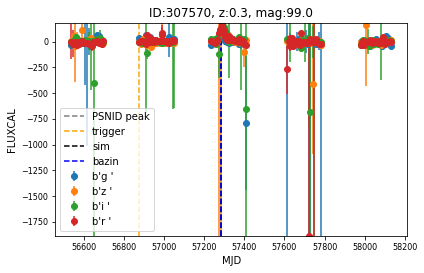

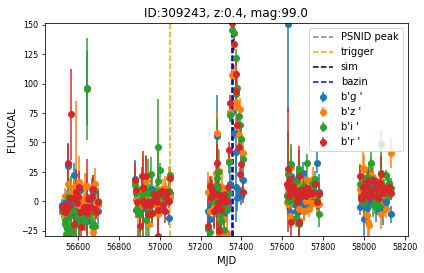

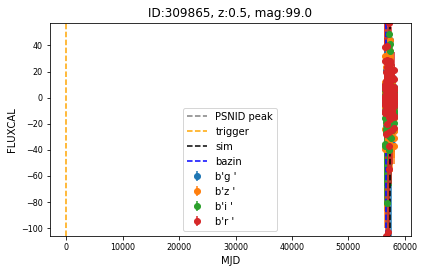

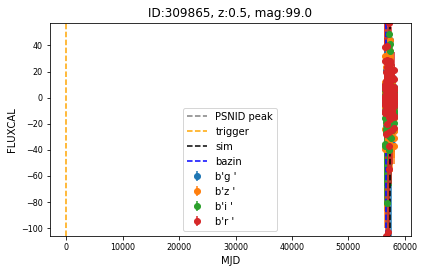

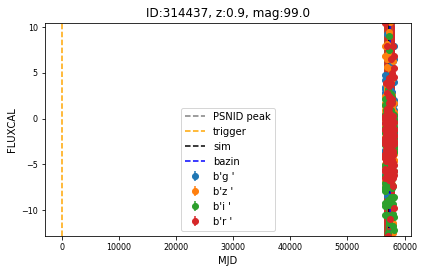

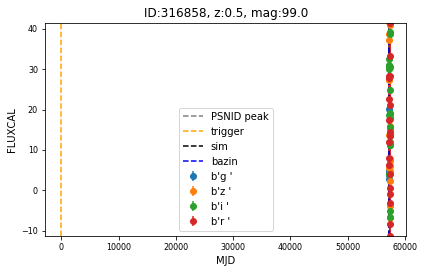

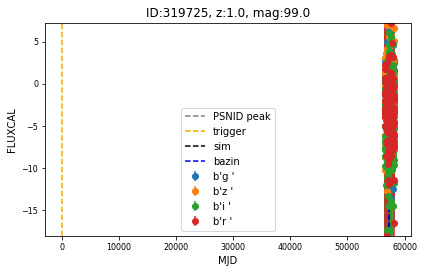

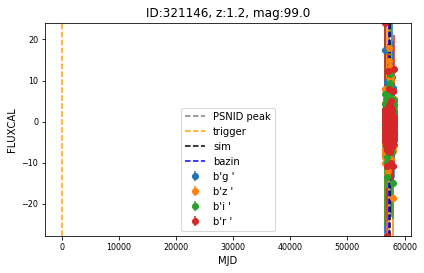

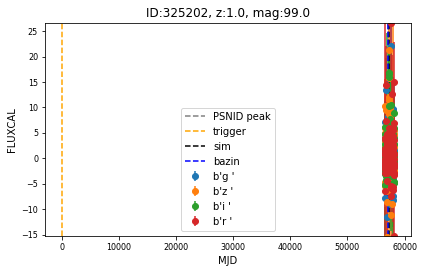

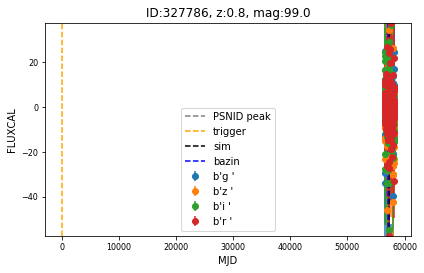

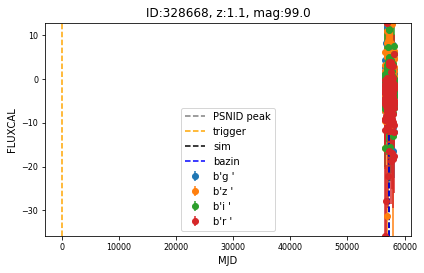

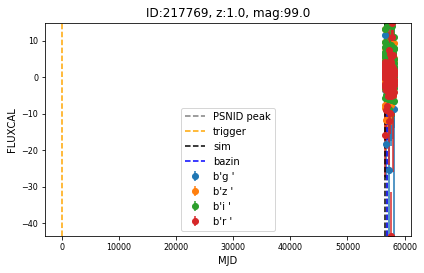

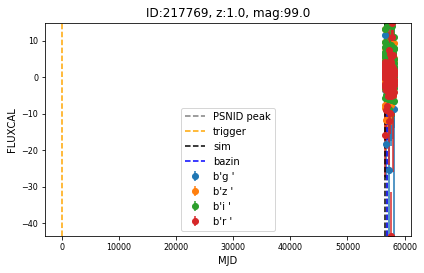

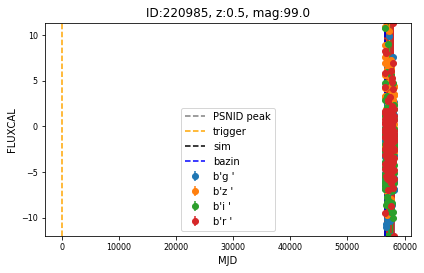

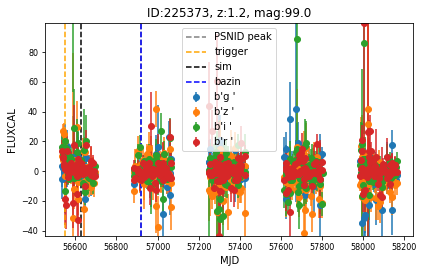

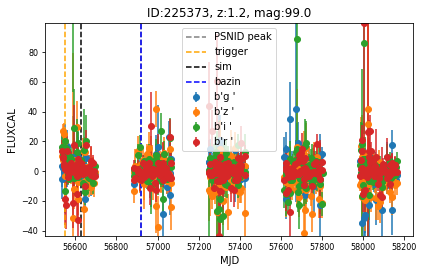

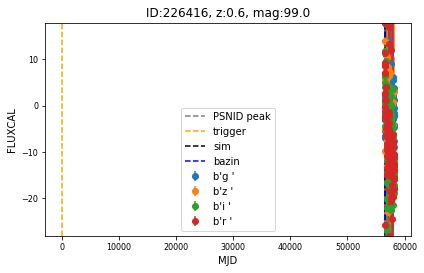

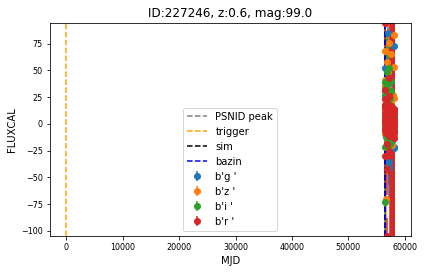

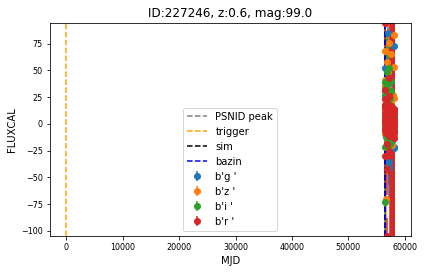

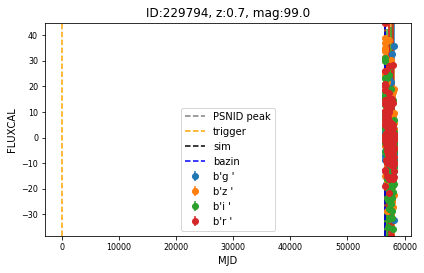

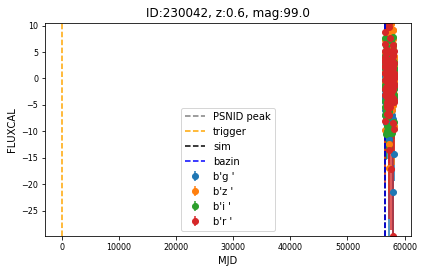

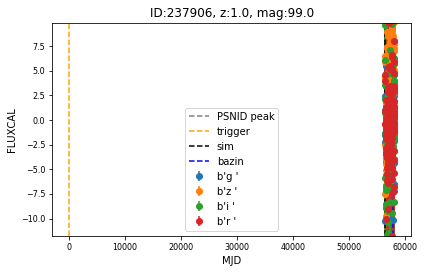

In [11]:
vu.plot_random_lcs(df_wp_fail_trigger, '../dumps/fail_trigger_negative/', multiplots=False, nb_lcs=100, plot_peak=True)
# vu.plot_random_lcs(df_wp_fail_bazin, '../dumps/fail_bazin_SNRMAX1_10/', multiplots=False, nb_lcs=50, plot_peak=True)